<a href="https://colab.research.google.com/github/msivakumar47/SIVAKUMAR-M/blob/main/k_means_project16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

K=1 | Train Accuracy: 1.000 | Test Accuracy: 0.967 | Time(s): 0.0069
K=3 | Train Accuracy: 0.967 | Test Accuracy: 0.933 | Time(s): 0.0046
K=5 | Train Accuracy: 0.975 | Test Accuracy: 0.933 | Time(s): 0.0045
K=7 | Train Accuracy: 0.967 | Test Accuracy: 0.967 | Time(s): 0.0042
K=9 | Train Accuracy: 0.958 | Test Accuracy: 0.967 | Time(s): 0.0041
K=11 | Train Accuracy: 0.958 | Test Accuracy: 0.967 | Time(s): 0.0041
K=13 | Train Accuracy: 0.958 | Test Accuracy: 0.967 | Time(s): 0.0041
K=15 | Train Accuracy: 0.967 | Test Accuracy: 0.933 | Time(s): 0.0044


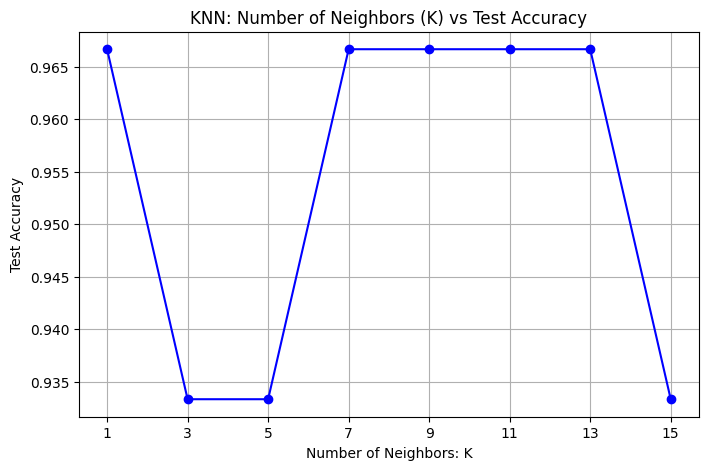


Optimal K: 1 with Test Accuracy: 0.967

Analysis:
- Smaller values of K (e.g., K=1) tend to have high training accuracy but lower testing accuracy, indicating overfitting and high variance.
- Larger values of K smooth out decision boundaries, reducing variance but potentially increasing bias and underfitting.
- The optimal K balances bias and variance, giving the best generalization performance on unseen data.



In [7]:
import numpy as np
import matplotlib.pyplot as plt
import time
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# 1. Load data and scale features
data = load_iris()
X = data.data
y = data.target

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 2. Split into train and test sets (80/20)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

# 3. Train/test KNN for various odd K values and record metrics
k_values = list(range(1, 16, 2))  # odd values from 1 to 15
train_accuracies = []
test_accuracies = []
times = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)

    start_time = time.time()
    knn.fit(X_train, y_train)
    train_pred = knn.predict(X_train)
    test_pred = knn.predict(X_test)
    end_time = time.time()

    train_acc = accuracy_score(y_train, train_pred)
    test_acc = accuracy_score(y_test, test_pred)
    elapsed_time = end_time - start_time

    train_accuracies.append(train_acc)
    test_accuracies.append(test_acc)
    times.append(elapsed_time)

    print(f"K={k} | Train Accuracy: {train_acc:.3f} | Test Accuracy: {test_acc:.3f} | Time(s): {elapsed_time:.4f}")

# 4. Plot K vs Testing Accuracy
plt.figure(figsize=(8, 5))
plt.plot(k_values, test_accuracies, marker='o', linestyle='-', color='b')
plt.title('KNN: Number of Neighbors (K) vs Test Accuracy')
plt.xlabel('Number of Neighbors: K')
plt.ylabel('Test Accuracy')
plt.xticks(k_values)
plt.grid(True)
plt.show()

# 5. Textual analysis of results
optimal_k = k_values[np.argmax(test_accuracies)]
print(f"\nOptimal K: {optimal_k} with Test Accuracy: {max(test_accuracies):.3f}")

print("""
Analysis:
- Smaller values of K (e.g., K=1) tend to have high training accuracy but lower testing accuracy, indicating overfitting and high variance.
- Larger values of K smooth out decision boundaries, reducing variance but potentially increasing bias and underfitting.
- The optimal K balances bias and variance, giving the best generalization performance on unseen data.
""")
